In [16]:
# IMPORTS:
import numpy as np
import scipy as sci
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
#Question 6: Write a code snippet that concatenates three NumPy arrays, where the first array is equal to seven 0 values, the second array is equal to five 1 values and the third array is equal to seven 0 values.

#Creating the arrays
arr1 = np.array([0, 0, 0, 0, 0, 0, 0]) #first array of seven 0s
arr2 = np.array([1, 1, 1, 1, 1]) #second array of five 1s
arr3 = np.array([0, 0, 0, 0, 0, 0, 0]) #third array of seven 0s

#Concatenating the three Numpy arrays 
print(np.concatenate((arr1, arr2, arr3), axis=0)) #row-wise concatenation

[0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]


In [18]:
#Question 7: using the result from question 6, convolve the result array with itself using the definiton of convolution. 

#Function that computes linear convolution of two signals. In this case the array from question 6 is convolved with itself.
def direct_conv(f,g):
    N1 = len(f)
    N2 = len(g)
    N = N1 + N2 - 1
    
    #place holder for the output
    y = np.zeros(N)
    
    m = N-N1
    n = N-N2    
    #Padding zeros to x and h to make their length to N
    f =np.pad(f,(0,m),'constant')
    g =np.pad(g,(0,n),'constant')

    #Linear convolution using convolution sum formula
    for n in range (N):
        for k in range (N):
            if n >= k:
                 y[n] = y[n]+f[n-k]*g[k]
                    
    return y
#output array from question 6
output_arr = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]) 

#calling direct_conv to perform the convolution
conv_out = direct_conv(output_arr, output_arr)
print(conv_out)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5. 4. 3. 2. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:

#Question 8: Repeat question 7 but use the SciPy's signal.convolve function

#Using Scipy conv function for convolving 2 signals
from scipy import signal

scipy_conv_out = signal.convolve(output_arr, output_arr, mode='full') 
print(scipy_conv_out)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


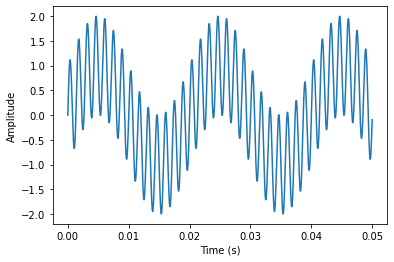

In [20]:
# Problem 9: Generate a signal that is the sum of two sine waves with frequencies 50 Hz and 700 Hz, respectively. Plot the result in time domain. Assume a sampling frequency of 44.1 kHz.

# function that takes in two different frequencies (f1 and f2) for the sum of the two sine waves with a sampling frequency (Fs) that is sampled for certain time (sample_time) to create a plot in time domain
def signal_func(f1,f2,Fs,sample_time):
    
    pi = np.pi          # defining pi as a variable
    sin = np.sin        # defining sin as a variable
    
    T = 1/Fs            # sampling period
    N = Fs*sample_time  # total number of points in the signal
    
    # sum of 2 sine waves with different frequencies across time
    t = np.arange(N)*T                          # time, x-axis
    signal = sin(2*pi*f1*t)+sin(2*pi*f2*t)      # signal, y-axis

    # plot the signal in time domain
    plt.plot(t, signal)     # plotting signal w/ respect to time 
    plt.xlabel('Time (s)')      # x-axis, time in seconds
    plt.ylabel('Amplitude')     # y-axis, amplitude of signal
    plt.show()

    return signal       # returning the signal

# signal parameters
f1 = 50                 # 50Hz frequency
f2 = 700                # 700Hz frequency
Fs = 44100              # sampling frequency of 44.1kHz
sample_time = 0.05      # total sampled time

# plotting the sum of two sine wave signal
signal_plot = signal_func(f1,f2,Fs,sample_time)


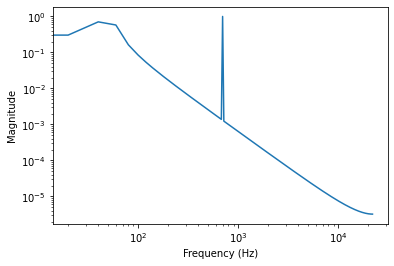

In [21]:
# Problem 10: Using your response in Question 9, plot the frequency response.

def FFT_func(signal,N):

    fft = np.fft.fft    # defining FFT as a variable
    
    # frequency response of the 2 sin wave summed signal
    f = Fs*np.arange(N/2)/N                     # freq, x-axis
    signal_FFT = fft(signal)[0:int(N/2)+1]/N    # FFT of signal
    signal_FFT[1:] = 2*signal_FFT[1:]   # taking positive side 
    signal_FFT = np.abs(signal_FFT)     # neglecting imaginary

    # plot the new signal in frequency domain
    plt.plot(f, signal_FFT) # plotting signal w/ respect to freq
    plt.xscale('log')               # log scale x-axis
    plt.yscale('log')               # log scale y-axis
    plt.xlabel('Frequency (Hz)')    # x-axis, frequency in hertz
    plt.ylabel('Magnitude')         # y-axis, magnitude of signal
    plt.show()

    return signal_FFT       # return the magnitude response

# signal parameters
N = Fs*sample_time  # total number of points in the signal

# plotting the frequnecy response using the signal from #9
mag_plot = FFT_func(signal_plot,N)
